# K Means Clustering - Color Quantization

## How can we apply K Means to RGB color channels and images?

**Consider the following image**


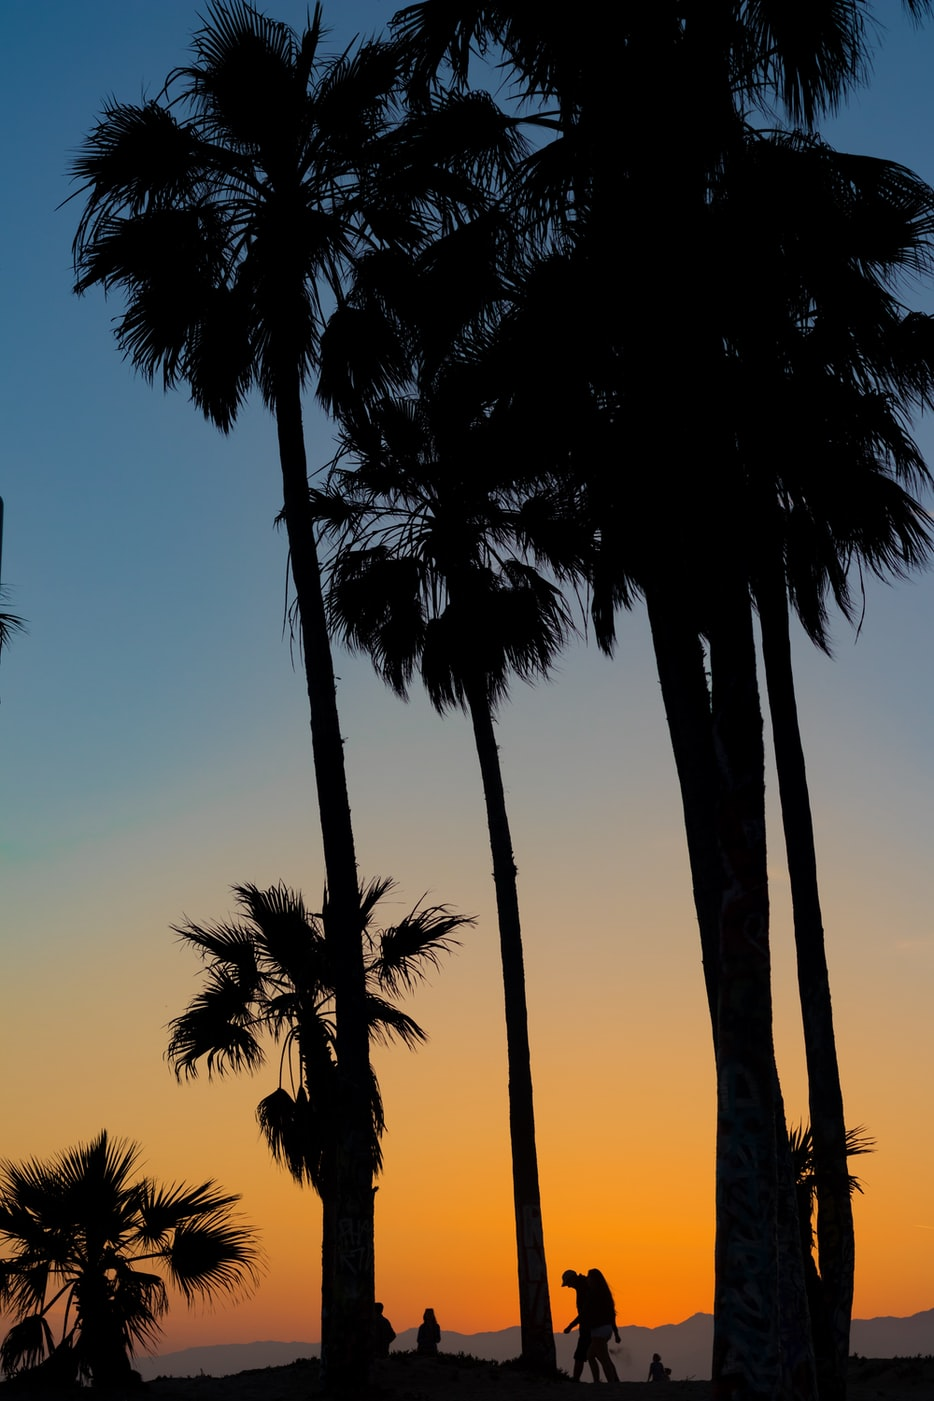

In [2]:
from IPython.display import Image
Image("palm_trees.jpg")

* Recall the image is a 3d array (Height, Width, Color channels).
* Each pixel will have RGB values.
* We can reshape the image to an X array feature set.

We can reformat the color matrices by pixel to 3 columns with Height x Width number of rows.

Calculating the cluster centers by average color values we can grab each data point an convert it to the same value as the center. --> **Color quantization**

In [3]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# Reading our image as an array
mpimg.imread("palm_trees.jpg") # 3dimensional object

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [5]:
image_as_array = mpimg.imread("palm_trees.jpg")

In [6]:
image_as_array.shape # H, W, C

(1401, 934, 3)

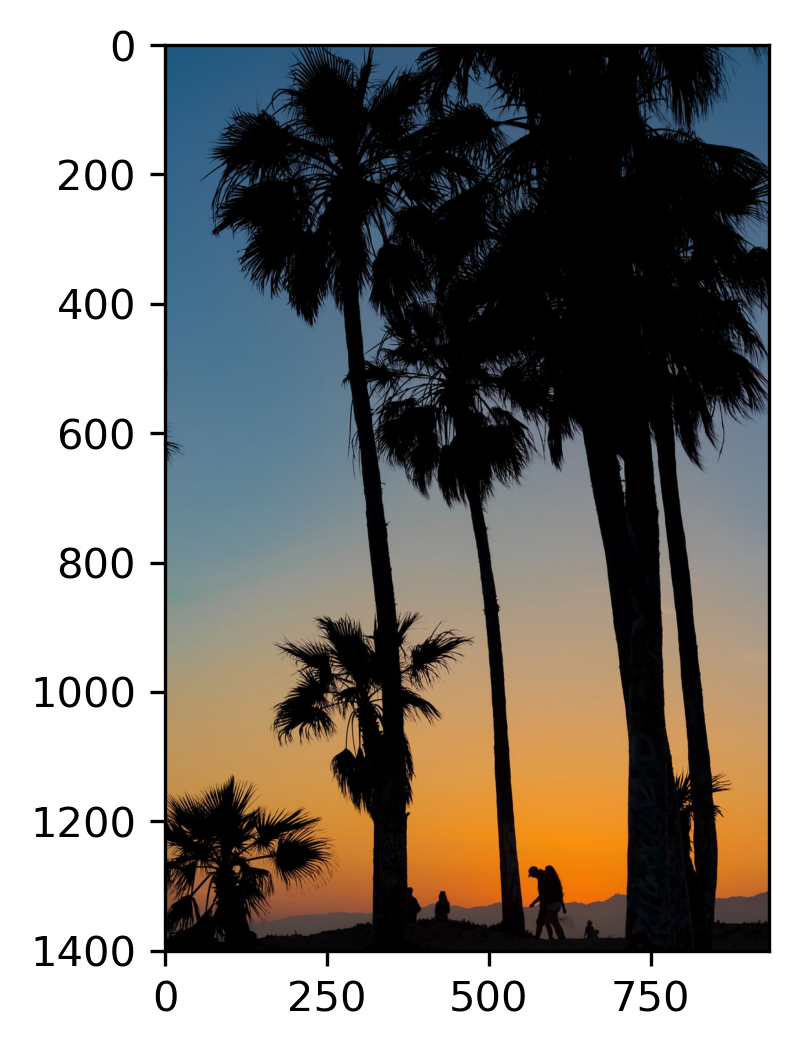

In [10]:
plt.figure(dpi=300)
plt.imshow(image_as_array);

In [11]:
# We now have a 3 dimensional array and we need to convert it to a 2dimensional

image_as_array.shape

(1401, 934, 3)

In [14]:
(h,w,c) = image_as_array.shape

In [15]:
h

1401

In [16]:
w

934

In [17]:
c

3

In [18]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [20]:
# 3d
len(image_as_array.shape)

3

In [21]:
# 2d
len(image_as_array2d.shape)

2

In [22]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=6)

In [24]:
labels = model.fit_predict(image_as_array2d)

In [25]:
# number of points
h*w

1308534

In [26]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# the 6 averaged rgb values
model.cluster_centers_

array([[  2.78978277,   2.60773757,   3.73395076],
       [ 72.32238127, 110.23969152, 138.27515535],
       [219.3721715 , 134.72492237,  45.55368797],
       [ 67.68032113,  62.12539651,  62.74153123],
       [193.94579707, 154.56016545, 106.90179572],
       [139.89800994, 144.75427439, 143.09464522]])

In [28]:
# Rounded values
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [29]:
rgb_codes

array([[  3,   3,   4],
       [ 72, 110, 138],
       [219, 135,  46],
       [ 68,  62,  63],
       [194, 155, 107],
       [140, 145, 143]])

In [30]:
# Reassigns the points to the cluster center colors
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [32]:
# 3D Quantized image
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

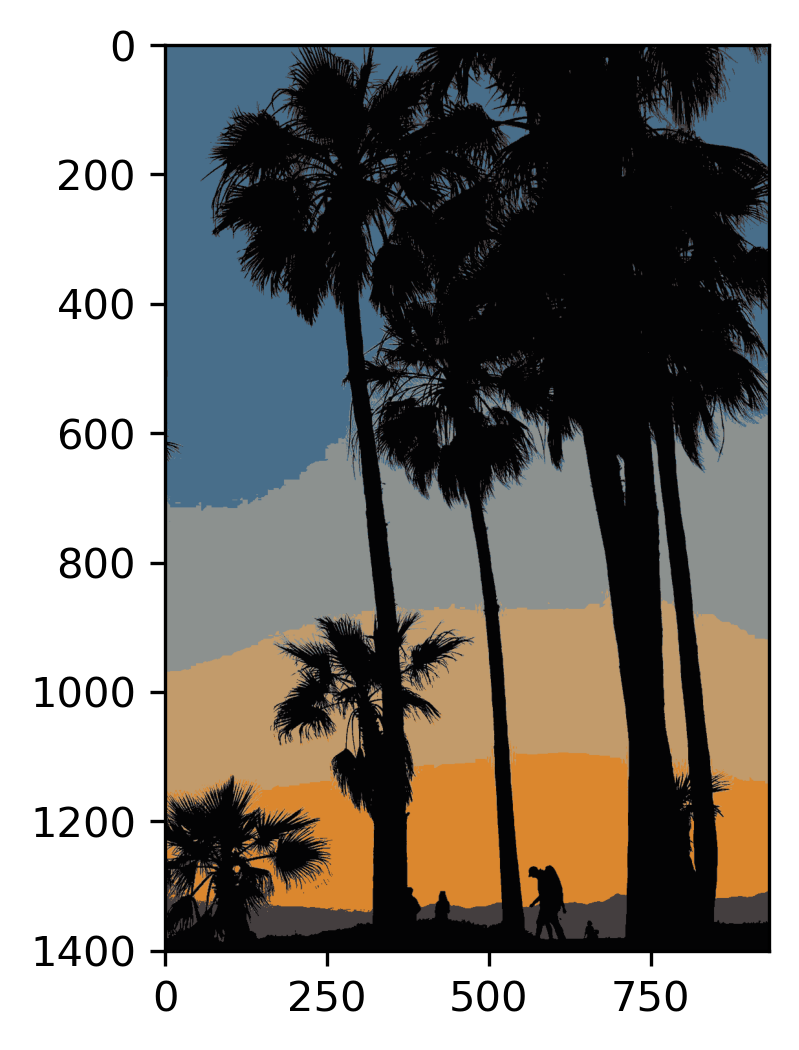

In [34]:
# Image with 6 colors
plt.figure(dpi=300)
plt.imshow(quantized_image)